<a href="https://colab.research.google.com/github/Rok-sana/ML-course/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             roc_auc_score,
                             r2_score,
                             accuracy_score,
                             confusion_matrix,
                             mutual_info_score,
                             f1_score)

from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     cross_val_score,
                                     GridSearchCV)

from sklearn import preprocessing
from sklearn.preprocessing import(MinMaxScaler,
                                  StandardScaler)

from sklearn.linear_model import (LogisticRegression,
                                  LogisticRegressionCV,
                                  LinearRegression)
                                  

import pandas_profiling
from yellowbrick.features import Rank2D
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [ ]:
wine_red_df = pd.read_csv("winequality-red.csv", sep=';', skipinitialspace=True)
wine_white_df = pd.read_csv("winequality-white.csv",sep=';', skipinitialspace=True)

In [ ]:
wine_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df = pd.concat([wine_red_df, wine_white_df.reindex(columns = wine_red_df.columns)], ignore_index = True)
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

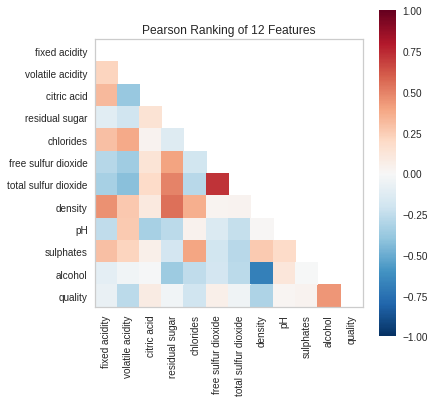

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
pcv = Rank2D(features=df.columns, algorithm="pearson")
pcv.fit(df, df.quality)
pcv.transform(df)
pcv.poof()

Alcohol_level show correation bettwen alcohol and quality. Based on map above - alcohol -quality corr == around 0.6
Density_level show correation bettwen density and quality. Based on map above - density -quality corr == around -0.55 ( minor corr)


In [ ]:
def calculate_feature_relation(df,feature):
    median = df[feature].median()
    for i, value in enumerate(df[feature]):
        if value >= median:
            df.loc[i,feature + "_level"] = 1
        else:
            df.loc[i,feature + "_level"] = 0

In [ ]:
calculate_feature_relation(df,'alcohol')
calculate_feature_relation(df,'density')

In [ ]:
df.groupby('alcohol_level').quality.mean()

alcohol_level
0.0    5.475921
1.0    6.146084
Name: quality, dtype: float64

In [ ]:
df.groupby('density_level').quality.mean()

density_level
0.0    6.048968
1.0    5.588000
Name: quality, dtype: float64

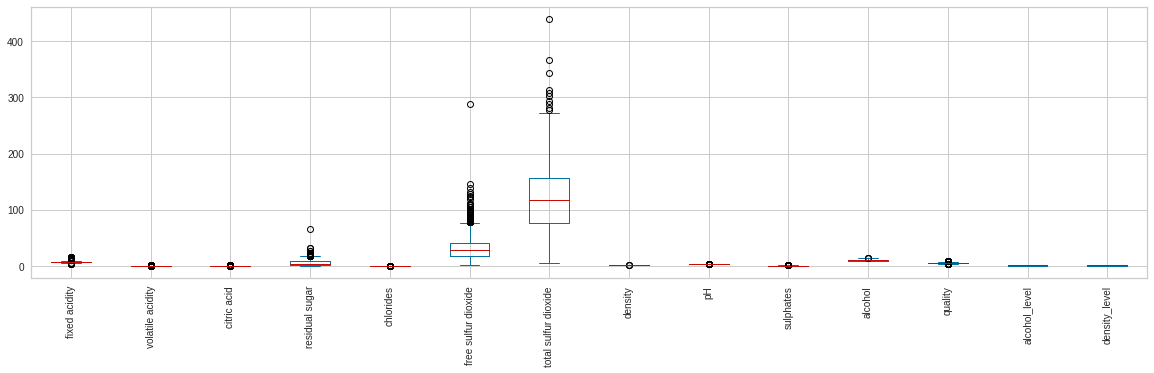

In [ ]:
df.plot.box(figsize=(20,5), rot=90)

Because of data isn't normalize and have outliners we will be use StandardScaler.

In [ ]:
std = preprocessing.StandardScaler()

In [ ]:
df = pd.DataFrame(std.fit_transform(df), columns = df.columns)

In [ ]:
std.scale_

array([1.29633398e+00, 1.64623803e-01, 1.45306681e-01, 4.75743758e+00,
       3.50309051e-02, 1.77480338e+01, 5.65175045e+01, 2.99844222e-03,
       1.60774828e-01, 1.48794421e-01, 1.19261996e+00, 8.73188064e-01,
       4.99878874e-01, 4.99999947e-01])

In [ ]:
std.mean_

array([7.21530706e+00, 3.39666000e-01, 3.18633215e-01, 5.44323534e+00,
       5.60338618e-02, 3.05253194e+01, 1.15744574e+02, 9.94696634e-01,
       3.21850085e+00, 5.31268278e-01, 1.04918008e+01, 5.81837771e+00,
       5.11005079e-01, 5.00230876e-01])

In [ ]:
df_std = (df - df.mean()) / df.std()

df_std need to tracking the original mean and standard deviation

In [ ]:
df_std

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_level,density_level
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,-1.022179,0.999461
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,-0.937157,-1.022179,0.999461
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,-0.937157,-1.022179,0.999461
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,0.207983,-1.022179,0.999461
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,-0.937157,-1.022179,0.999461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783154,-0.787590,-0.197039,-0.807775,-0.486215,-0.367636,-0.420095,-1.186069,0.320294,-0.210128,0.593772,0.207983,0.978152,-1.000385
6493,-0.474615,-0.119451,0.284664,0.537383,-0.257863,1.491582,0.924517,0.067819,-0.426034,-0.478935,-0.747709,-0.937157,-1.022179,0.999461
6494,-0.551750,-0.605370,-0.885185,-0.891847,-0.429127,-0.029596,-0.083942,-0.719196,-1.421138,-0.478935,-0.915394,0.207983,-1.022179,-1.000385
6495,-1.323097,-0.301671,-0.128224,-0.912866,-0.971463,-0.592996,-0.101635,-2.003097,0.755652,-1.016548,1.935253,1.353124,0.978152,-1.000385


In [ ]:
df_std.mean()

fixed acidity          -1.049902e-16
volatile acidity        3.499672e-17
citric acid             2.187295e-17
residual sugar          3.499672e-17
chlorides               5.249508e-17
free sulfur dioxide    -1.749836e-17
total sulfur dioxide    3.499672e-17
density                 3.499672e-17
pH                      0.000000e+00
sulphates               3.499672e-17
alcohol                 1.749836e-17
quality                -3.499672e-17
alcohol_level          -6.124426e-17
density_level          -1.749836e-17
dtype: float64

In [ ]:
df_std.std()

fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
quality                 1.0
alcohol_level           1.0
density_level           1.0
dtype: float64

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_level,density_level
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,-1.022258,0.999538
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,-1.022258,0.999538
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,-1.022258,0.999538
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,-1.022258,0.999538
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,-1.022258,0.999538


In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
alcohol_level           float64
density_level           float64
dtype: object

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = df_train.quality
y_val = df_val.quality
y_test = df_test.quality

del df_train['quality']
del df_val['quality']
del df_test['quality']

In [ ]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

  

In [ ]:
len(df_train), len(df_val), len(df_test)

(3897, 1300, 1300)

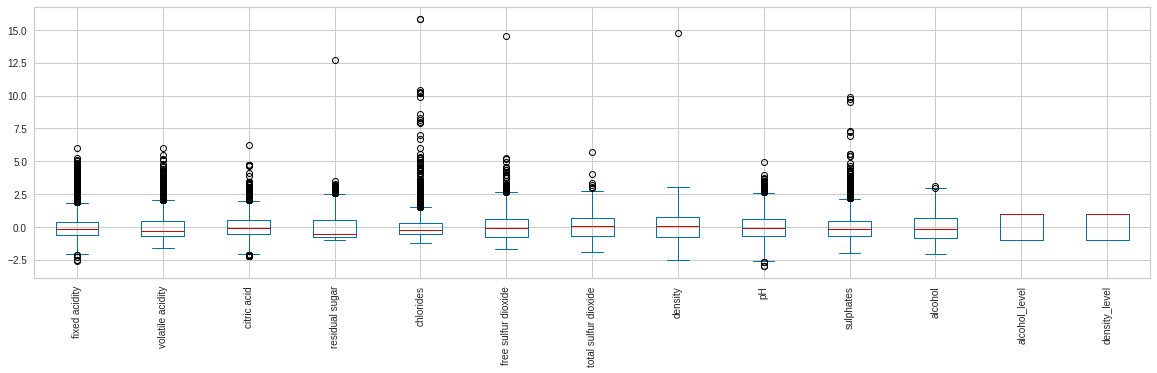

In [ ]:
df_train.plot.box(figsize=(20,5), rot=90)

Data distributed with StandartScaler

In [ ]:
##  Fit a logistic regression classifier without regularization
clf_no_reg = LogisticRegression(penalty="none", max_iter= 1000000)
clf_no_reg.fit(df_train, y_train)

LogisticRegression(max_iter=1000000, penalty='none')

In [ ]:
from sklearn.metrics import f1_score
y_pred_val = clf_no_reg.predict(df_val)
y_pred_test = clf_no_reg.predict(df_test)
print('Validation Score', f1_score(y_val, y_pred_val,average="micro"))
print('Test Score', f1_score(y_test, y_pred_test, average="micro"))

Validation Score 0.7415384615384616
Test Score 0.7838461538461537


In [ ]:
clf_default = LogisticRegression(max_iter= 1000000)
clf_default.fit(df_train, y_train)

LogisticRegression(max_iter=1000000)

In [ ]:
y_pred_test = clf_default.predict(df_test)
y_pred_val = clf_default.predict(df_val)
print('Validation Score', f1_score(y_val, y_pred_val, average="micro"))
print('Testing Score', f1_score(y_test, y_pred_test, average="micro"))

Validation Score 0.7430769230769231
Testing Score 0.7830769230769231


In [ ]:
# Hyperparameter tuning
training_array = []
val_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]

for x in C_array:
  clf = LogisticRegression(C = x, max_iter= 10000)
  clf.fit(df_train, y_train)
  y_pred_val = clf.predict(df_val)
  y_pred_train = clf.predict(df_train)
  training_array.append(f1_score(y_train, y_pred_train, average="micro"))
  val_array.append(f1_score(y_val, y_pred_val, average="micro"))


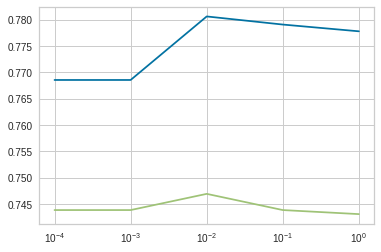

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot training and test scores as a function of C
plt.plot(C_array,training_array)
plt.plot(C_array,val_array)
plt.xscale('log')
plt.show()
plt.clf()


In [ ]:
## Making a parameter grid for GridSearchCV
C_array = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
tuning_C = {"C": C_array}

In [ ]:
# Implementing GridSearchCV with l2 penalty
clf_gs =  LogisticRegression(max_iter= 1000000)
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator= clf_gs, param_grid =tuning_C, scoring = 'f1_micro', cv = 2)
gs.fit(df_train, y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=1000000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000]},
             scoring='f1_micro')

In [ ]:
# Optimal C value and the score corresponding to it
print(gs.best_params_, gs.best_score_)


{'C': 0.1} 0.7780333830964755


In [ ]:
clf_best_ridge = LogisticRegression(C = gs.best_params_["C"], max_iter= 1000000)
clf_best_ridge.fit(df_train, y_train)
y_pred_best = clf_best_ridge.predict(df_test)
print(f1_score(y_test,y_pred_best,average="micro"))

0.7838461538461537


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
C_array = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(max_iter= 1000000, Cs=C_array, cv = 2, penalty = 'l1', scoring = 'f1_micro', solver = 'liblinear')
clf_l1.fit(df_train,y_train)

##  Optimal C value and corresponding coefficients
print('Best C value', clf_l1.C_)
print('Best fit coefficients', clf_l1.coef_)


Best C value [0.01       0.01       0.28480359 0.07054802 0.01       0.01      ]
Best fit coefficients [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.01097149  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.48731791  0.06768343 -0.00866239 -0.7024365   0.05676476 -0.13461909
   0.2544699   0.91875728 -0.32065822 -0.24576022 -0.30072654 -0.05030185
   0.15856169]
 [ 0.02013372 -0.55740646  0.          0.11290958 -0.16801586  0.07550584
  -0.17994056  0.          0.04012601  0.25433093  0.76722455  0.13797612
  -0.02290369]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.07826362  0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0

In [ ]:
y_pred_best = clf_l1.predict(df_val)
print(f1_score(y_val,y_pred_best,average="micro"))

0.7484615384615385


In [ ]:
y_pred_best = clf_l1.predict(df_test)
print(f1_score(y_test,y_pred_best,average="micro"))

0.7884615384615384


Best result of f1 score 0.7884615384615384

